In [1]:
# if the series is indeed a white noise, then ARMA modelling is not a good choice
# other ways
# although sometimes the autocorrelation of teh series itself is not obvious
# its functions (like ^2) can represent strong autocorr
# conditional heteroskedasticity
# volatility clustering
# heavy tail
# ARCH & GARCH

In [2]:
# can be used to well-modelling volatility

In [3]:
# ARCH modelling procedure for return seires {y_t}
# 1. test if {y_t} is stationary, build ARMA (mean models) and get residue series
# 2. test residue series, LB for its autocorrelation (if significant, ARCH effect)
#    or Lagrange Multiplier test
# 3. if significant in step 2, we have to build volatility models
# 4. estimating parameters
# 5. test the new model itself, if it is reasonable

In [5]:
import pandas as pd
SHret=pd.read_table('TRD_IndexSum.txt',index_col='Trddt',sep='\t')
SHret.index=pd.to_datetime(SHret.index)

Text(0.5,1,'Absolute Return of SH Index')

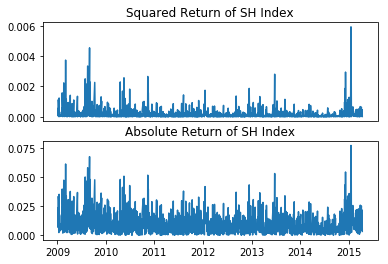

In [7]:
# plot return^2
import matplotlib.pyplot as plt 
import numpy as np
plt.subplot(211)
plt.plot(SHret**2)
plt.xticks([])
plt.title('Squared Return of SH Index')
plt.subplot(212)
plt.plot(np.abs(SHret))
plt.title('Absolute Return of SH Index')
# these plots clearly shows the vol clustering phenomenon (ARCH effect)

In [9]:
# LB test
from statsmodels.tsa import stattools
LjungBox=stattools.q_stat(stattools.acf(SHret**2)[1:13],len(SHret))
LjungBox[1][-1]
# p-value < 0.05, so it is not a white noise (it (vol) is autocorrelation)

2.2324582490602845e-43

In [10]:
# GARCH modelling (by default GARCH(1,1))
from arch import arch_model
am=arch_model(SHret)
# estimate params
# update_freq=0 means only print final results
model=am.fit(update_freq=0)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4464.735821909855
            Iterations: 9
            Function evaluations: 61
            Gradient evaluations: 5


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:522: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [11]:
print(model.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               Retindex   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                4464.74
Distribution:                  Normal   AIC:                          -8921.47
Method:            Maximum Likelihood   BIC:                          -8900.16
                                        No. Observations:                 1522
Date:                Mon, Oct 22 2018   Df Residuals:                     1518
Time:                        14:39:22   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.3255e-04  3.181e-04      1.045      0.296 